# HardNetMSEG

### Data

In [1]:
from data import *

# dirs
imgs_dir = "Kvasir-SEG/images/*.jpg"
masks_dir = "Kvasir-SEG/masks/*.jpg"

dataloader_train, dataloader_test, dataloader_val = get_data(imgs_dir, masks_dir, resize=352, batch_size=12)

### Model

In [2]:
# check device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [3]:
from model import *
model = HarDMSEG().cuda()

In [4]:
from torchsummary import summary

In [5]:
summary(model, (3, 352, 352))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 176, 176]             864
       BatchNorm2d-2         [-1, 32, 176, 176]              64
             ReLU6-3         [-1, 32, 176, 176]               0
            Conv2d-4         [-1, 64, 176, 176]          18,432
       BatchNorm2d-5         [-1, 64, 176, 176]             128
             ReLU6-6         [-1, 64, 176, 176]               0
         MaxPool2d-7           [-1, 64, 88, 88]               0
            Conv2d-8           [-1, 14, 88, 88]           8,064
       BatchNorm2d-9           [-1, 14, 88, 88]              28
            ReLU6-10           [-1, 14, 88, 88]               0
           Conv2d-11           [-1, 24, 88, 88]          16,848
      BatchNorm2d-12           [-1, 24, 88, 88]              48
            ReLU6-13           [-1, 24, 88, 88]               0
           Conv2d-14           [-1, 14,

### Train

In [ ]:
from train import train

In [ ]:
train_loss, train_precision, train_recall, train_dice, val_loss, val_precision, val_recall, val_dice = train(model, dataloader_train, dataloader_val, save_path='HardNetMSEG', batchsize=12, epochs_num=50)

### Test

In [1]:
from test import *
from data import *

In [2]:
# dirs
imgs_dir = "Kvasir-SEG/images/*.jpg"
masks_dir = "Kvasir-SEG/masks/*.jpg"

dataloader_train, dataloader_test, dataloader_val = get_data(imgs_dir, masks_dir, resize=352, batch_size=12)

In [3]:
get_test_score(dataloader_test, "HardNetMSEG.pth", batchsize=1, model_type='HardNetMSEG')

100it [00:07, 12.95it/s]

TEST: Loss: 0.369, Precision: 0.931, Recall: 0.888, mDice: 0.893


# UNet

### Data

In [1]:
from data import *

# dirs
imgs_dir = "Kvasir-SEG/images/*.jpg"
masks_dir = "Kvasir-SEG/masks/*.jpg"

dataloader_train, dataloader_test, dataloader_val = get_data(imgs_dir, masks_dir, resize=212, batch_size=8, model_type='UNet')

### Model

In [2]:
# check device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [3]:
from model_baseline import *
model = UNet().cuda()

In [4]:
from torchsummary import summary

In [5]:
summary(model, (3, 212, 212))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 212, 212]           1,792
       BatchNorm2d-2         [-1, 64, 212, 212]             128
              ReLU-3         [-1, 64, 212, 212]               0
            Conv2d-4         [-1, 64, 212, 212]          36,928
       BatchNorm2d-5         [-1, 64, 212, 212]             128
              ReLU-6         [-1, 64, 212, 212]               0
        DoubleConv-7         [-1, 64, 212, 212]               0
         MaxPool2d-8         [-1, 64, 106, 106]               0
            Conv2d-9        [-1, 128, 106, 106]          73,856
      BatchNorm2d-10        [-1, 128, 106, 106]             256
             ReLU-11        [-1, 128, 106, 106]               0
           Conv2d-12        [-1, 128, 106, 106]         147,584
      BatchNorm2d-13        [-1, 128, 106, 106]             256
             ReLU-14        [-1, 128, 1

### Train

In [6]:
from train import train

Device: cuda:0


In [7]:
train_loss, train_precision, train_recall, train_dice, val_loss, val_precision, val_recall, val_dice = train(model, dataloader_train, dataloader_val, save_path='UNet', batchsize=8, epochs_num=300)

  0%|▎                                                                               | 1/300 [01:30<7:31:32, 90.61s/it]

---------------
Epoch: 0
TRAIN: Loss: 1.11, Precision: 0.479, Recall: 0.578, mDice: 0.515
VAL: Loss: 1.294, Precision: 0.382, Recall: 0.775, mDice: 0.504
---------------


  7%|█████▍                                                                        | 21/300 [34:39<7:57:57, 102.79s/it]

---------------
Epoch: 20
TRAIN: Loss: 0.571, Precision: 0.802, Recall: 0.773, mDice: 0.776
VAL: Loss: 0.727, Precision: 0.727, Recall: 0.71, mDice: 0.711
---------------


 14%|██████████▌                                                                  | 41/300 [1:05:55<6:46:55, 94.27s/it]

---------------
Epoch: 40
TRAIN: Loss: 0.431, Precision: 0.852, Recall: 0.844, mDice: 0.843
VAL: Loss: 0.645, Precision: 0.831, Recall: 0.697, mDice: 0.742
---------------


 20%|███████████████▋                                                             | 61/300 [1:37:18<6:15:21, 94.23s/it]

---------------
Epoch: 60
TRAIN: Loss: 0.346, Precision: 0.888, Recall: 0.89, mDice: 0.886
VAL: Loss: 0.575, Precision: 0.854, Recall: 0.734, mDice: 0.774
---------------


 27%|████████████████████▊                                                        | 81/300 [2:09:43<5:48:13, 95.41s/it]

---------------
Epoch: 80
TRAIN: Loss: 0.342, Precision: 0.877, Recall: 0.89, mDice: 0.88
VAL: Loss: 0.564, Precision: 0.83, Recall: 0.762, mDice: 0.779
---------------


 34%|█████████████████████████▌                                                  | 101/300 [2:41:10<5:12:48, 94.32s/it]

---------------
Epoch: 100
TRAIN: Loss: 0.342, Precision: 0.893, Recall: 0.88, mDice: 0.884
VAL: Loss: 0.572, Precision: 0.848, Recall: 0.74, mDice: 0.774
---------------


 40%|██████████████████████████████▋                                             | 121/300 [3:12:38<4:41:24, 94.33s/it]

---------------
Epoch: 120
TRAIN: Loss: 0.329, Precision: 0.881, Recall: 0.905, mDice: 0.889
VAL: Loss: 0.567, Precision: 0.822, Recall: 0.767, mDice: 0.778
---------------


 47%|███████████████████████████████████▋                                        | 141/300 [3:45:06<4:21:16, 98.60s/it]

---------------
Epoch: 140
TRAIN: Loss: 0.325, Precision: 0.903, Recall: 0.88, mDice: 0.888
VAL: Loss: 0.567, Precision: 0.836, Recall: 0.752, mDice: 0.777
---------------


 54%|████████████████████████████████████████▊                                   | 161/300 [4:16:33<3:38:32, 94.33s/it]

---------------
Epoch: 160
TRAIN: Loss: 0.335, Precision: 0.887, Recall: 0.887, mDice: 0.883
VAL: Loss: 0.565, Precision: 0.824, Recall: 0.764, mDice: 0.778
---------------


 60%|█████████████████████████████████████████████▎                             | 181/300 [4:49:04<3:39:26, 110.64s/it]

---------------
Epoch: 180
TRAIN: Loss: 0.336, Precision: 0.889, Recall: 0.885, mDice: 0.884
VAL: Loss: 0.568, Precision: 0.847, Recall: 0.741, mDice: 0.775
---------------


 67%|██████████████████████████████████████████████████▉                         | 201/300 [5:20:29<2:35:42, 94.36s/it]

---------------
Epoch: 200
TRAIN: Loss: 0.338, Precision: 0.901, Recall: 0.883, mDice: 0.889
VAL: Loss: 0.565, Precision: 0.833, Recall: 0.757, mDice: 0.778
---------------


 74%|███████████████████████████████████████████████████████▉                    | 221/300 [5:51:56<2:04:08, 94.28s/it]

---------------
Epoch: 220
TRAIN: Loss: 0.313, Precision: 0.907, Recall: 0.897, mDice: 0.901
VAL: Loss: 0.568, Precision: 0.837, Recall: 0.752, mDice: 0.777
---------------


 80%|█████████████████████████████████████████████████████████████               | 241/300 [6:23:22<1:32:40, 94.25s/it]

---------------
Epoch: 240
TRAIN: Loss: 0.334, Precision: 0.888, Recall: 0.89, mDice: 0.885
VAL: Loss: 0.566, Precision: 0.838, Recall: 0.75, mDice: 0.776
---------------


 87%|██████████████████████████████████████████████████████████████████          | 261/300 [6:54:51<1:01:47, 95.06s/it]

---------------
Epoch: 260
TRAIN: Loss: 0.328, Precision: 0.905, Recall: 0.883, mDice: 0.891
VAL: Loss: 0.57, Precision: 0.833, Recall: 0.752, mDice: 0.775
---------------


 94%|█████████████████████████████████████████████████████████████████████████     | 281/300 [7:27:18<29:58, 94.65s/it]

---------------
Epoch: 280
TRAIN: Loss: 0.336, Precision: 0.909, Recall: 0.877, mDice: 0.889
VAL: Loss: 0.571, Precision: 0.85, Recall: 0.737, mDice: 0.774
---------------


100%|██████████████████████████████████████████████████████████████████████████████| 300/300 [7:57:22<00:00, 95.47s/it]


### Test

In [8]:
from test import *
from data import *

In [9]:
# dirs
imgs_dir = "Kvasir-SEG/images/*.jpg"
masks_dir = "Kvasir-SEG/masks/*.jpg"

dataloader_train, dataloader_test, dataloader_val = get_data(imgs_dir, masks_dir, resize=212, batch_size=8, model_type='UNet')

In [10]:
get_test_score(dataloader_test, "UNet.pth", batchsize=1, model_type='UNet')

100it [00:08, 12.41it/s]

TEST: Loss: 0.44, Precision: 0.877, Recall: 0.838, mDice: 0.837


# Predict

In [1]:
from predict_viz import *
import glob

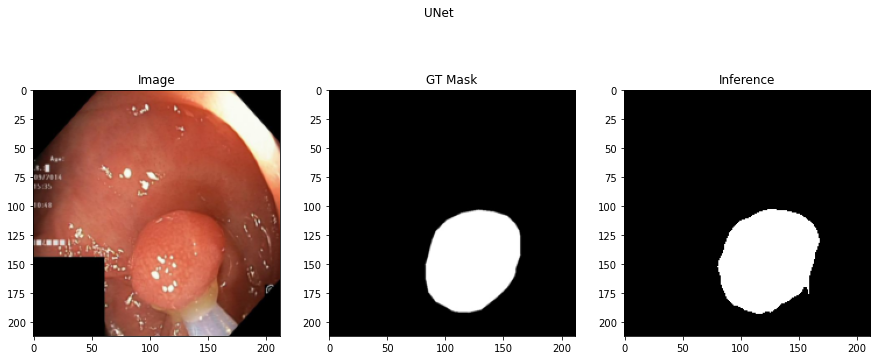

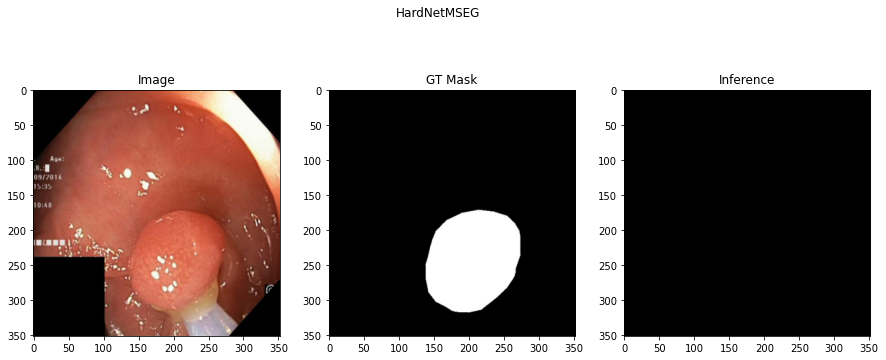

------------------------------


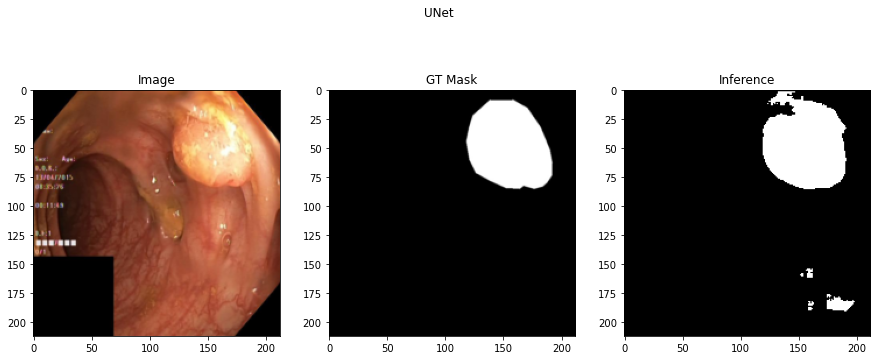

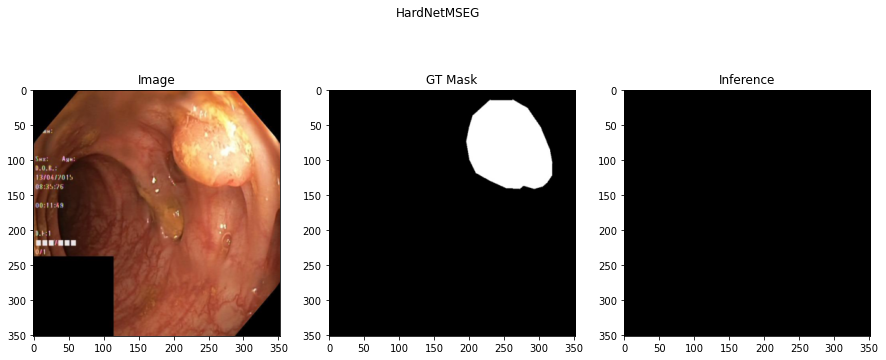

------------------------------


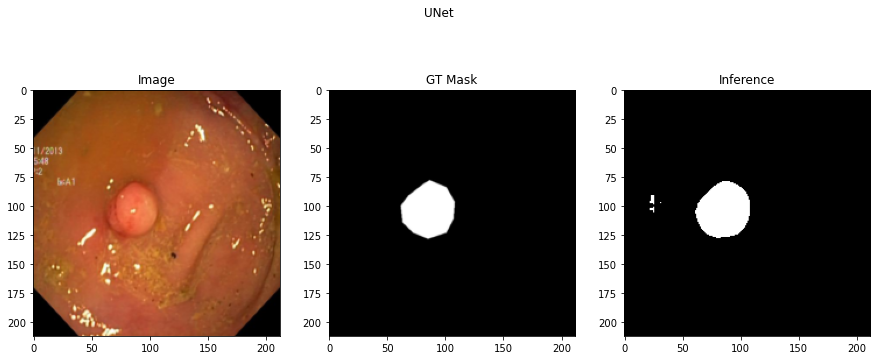

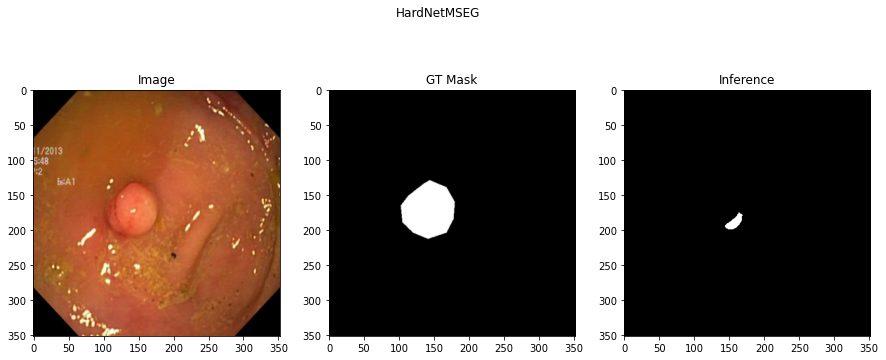

------------------------------


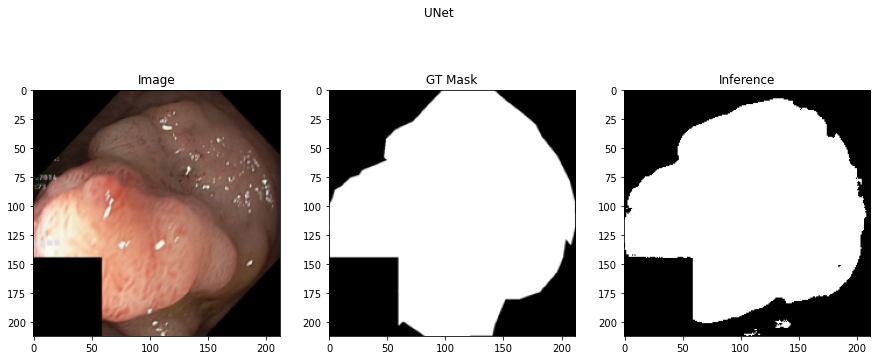

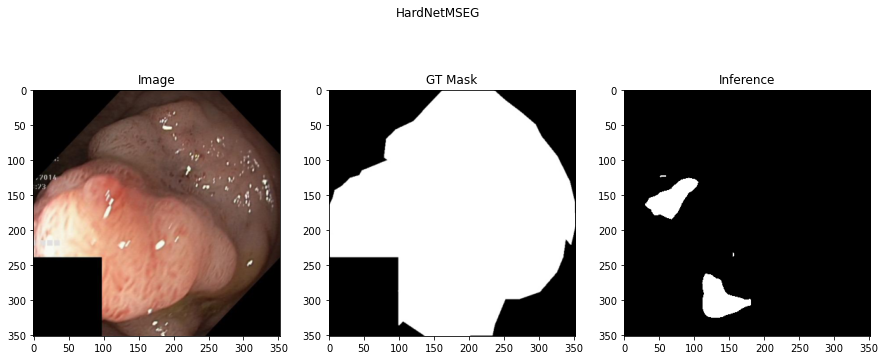

------------------------------


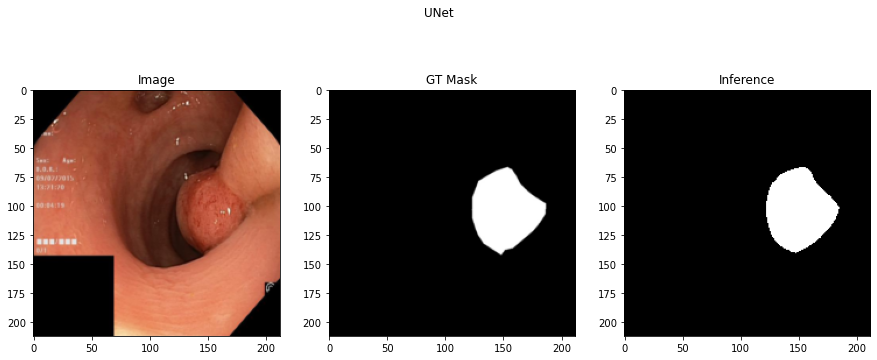

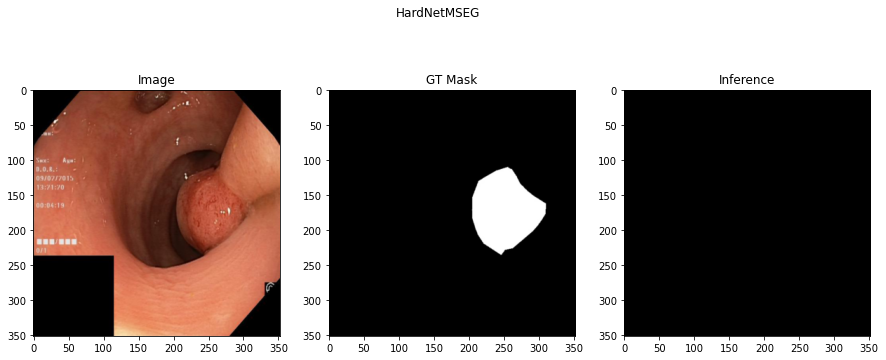

------------------------------


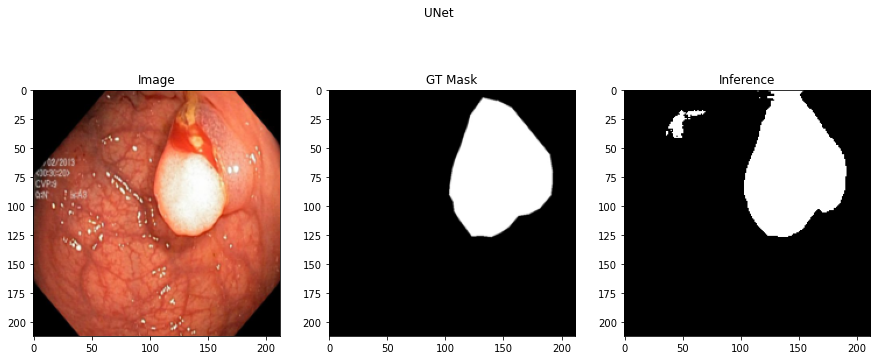

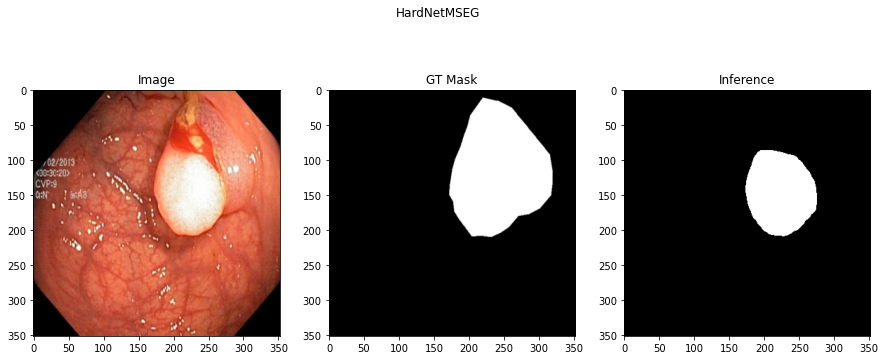

------------------------------


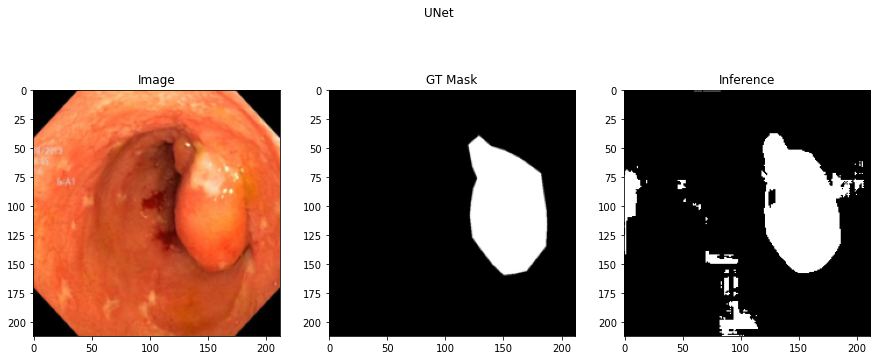

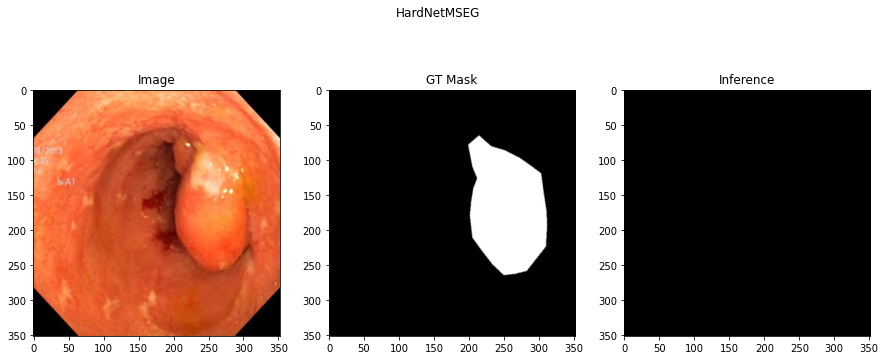

------------------------------


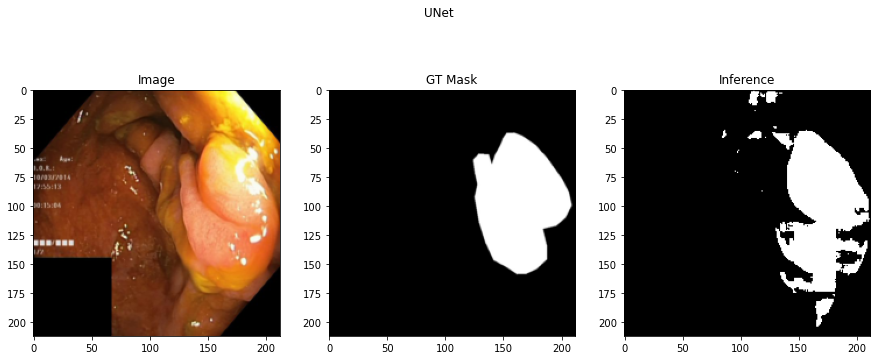

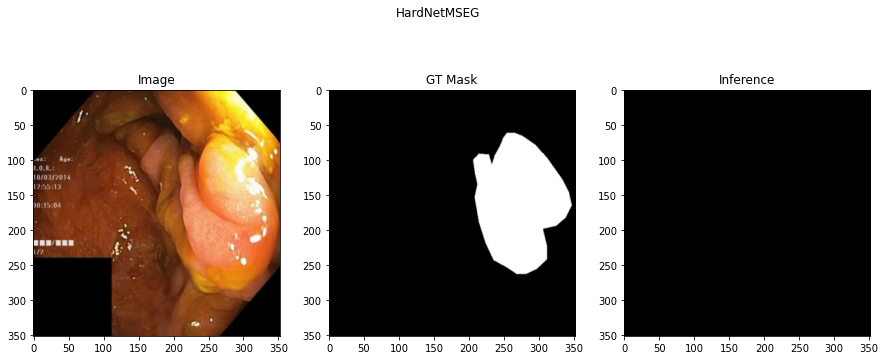

------------------------------


KeyboardInterrupt: 

In [3]:
%%time
random_images = np.random.randint(1000, size=30)

for img_num in random_images:

    img_dir = "Kvasir-SEG/images/*.jpg"
    mask_dir = "Kvasir-SEG/masks/*.jpg"
    img_path = glob.glob(img_dir)[img_num]
    mask_path = glob.glob(mask_dir)[img_num]
    
    img_viz, mask_viz, unet_pred = pred_and_viz(img_path, mask_path, model_type='UNet', model_path='UNet.pth', resize=212, title='UNet')
    img_viz, mask_viz, hardnet_pred = pred_and_viz(img_path, mask_path, model_type='HardNetMSEG', model_path='HardNetMSEG.pth', resize=352, title='HardNetMSEG')
    print('-'*30)
    
    
    break

In [ ]:
    # viz
    fig, ax = plt.subplots(1, 3, figsize=(15, 6))
    ax[0].imshow(img_viz)
    ax[0].title.set_text("Image")
    ax[1].imshow(mask_viz, cmap="gray")
    ax[1].title.set_text("GT Mask")
    ax[2].imshow(pred_viz, cmap="gray")
    ax[2].title.set_text("Inference")
    plt.show()

In [18]:
img_viz = (img_viz*255).astype(np.int32)
mask_viz = (mask_viz*255).astype(np.int32)

In [49]:
np.where(mask_viz!=0)

(array([  0,   0,   0, ..., 211, 211, 211], dtype=int64),
 array([  0,   0,   0, ..., 135, 135, 135], dtype=int64),
 array([0, 1, 2, ..., 0, 1, 2], dtype=int64))

In [54]:
a0 = np.where(mask_viz == 0)[0]
a1 = np.where(mask_viz == 0)[1]
a2 = np.where(mask_viz == 0)[2]

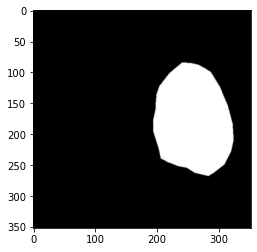

In [4]:

plt.imshow(img_viz, cmap='jet', alpha=0.3)
plt.imshow(mask_viz, cmap='gray')

In [50]:
mask_viz[0][0]

array([22, 22, 22])

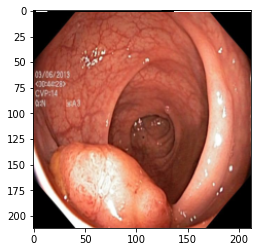

In [55]:
plt.imshow(img_viz)

In [13]:
mask_viz.shape

(212, 212, 3)

In [16]:
mask_viz[2]

array([[0.00392157, 0.00392157, 0.00392157],
       [0.        , 0.        , 0.        ],
       [0.00392157, 0.00392157, 0.00392157],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.

In [4]:
np.unique(img_viz)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [5]:
img_viz.shape, mask_viz.shape

((212, 212, 3), (212, 212, 3))

In [ ]:
import pylab
import numpy


def makeData():
    x = numpy.arange(-10, 10, 0.05)
    y = numpy.arange(-10, 10, 0.05)
    xgrid, ygrid = numpy.meshgrid(x, y)

    zgrid = (numpy.sin(xgrid * 0.3) * numpy.cos(ygrid * 0.75) /
             (1 + numpy.abs(xgrid * ygrid) * 0.05))
    return xgrid, ygrid, zgrid


if __name__ == '__main__':
    x, y, z = makeData()
    pylab.contourf(x, y, z)

    pylab.show()